In [1]:
# Make soup
import requests
from bs4 import BeautifulSoup
request = requests.get('https://films.criterionchannel.com/')
soup = BeautifulSoup(request.content, 'html.parser')

In [2]:
# Scrape titles
titles = []
for title in soup.findAll(class_ = "criterion-channel__td criterion-channel__td--title"):
    # print(title.get_text())
    nt = title.get_text()
    no_t = nt.replace('\t', '')
    no_nt = no_t.replace('\n', '')
    titles.append(no_nt)
print(len(titles))
print(titles[-1])

2196
Zorns Lemma


In [3]:
# Scrape urls
urls = []
for url in soup.findAll('a', href = True):
    urls.append(url.get('href'))
urls = urls[3:]
urls = urls[1:2197]
print(len(urls))
print(urls[-1])

2196
https://www.criterionchannel.com/zorns-lemma


In [4]:
# Scrape directors
directors = []
for director in soup.findAll(class_ = 'criterion-channel__td criterion-channel__td--director'):
    nt = director.get_text()
    no_t = nt.replace('\t', '')
    no_nt = no_t.replace('\n', '')
    directors.append(no_nt)
print(len(directors))
print(directors[-1])

2196
Hollis Frampton


In [5]:
# Scrape countries
countries = []
for country in soup.findAll(class_ = 'criterion-channel__td criterion-channel__td--country'):
    nt = country.get_text()
    no_t = nt.replace('\t', '')
    no_nt = no_t.replace('\n', '')
    no_comma = no_nt[:-1]
    countries.append(no_comma)
print(len(countries))
print(countries[-1])

2196
United States


In [6]:
# Scrape years
years = []
for year in soup.findAll(class_ = 'criterion-channel__td criterion-channel__td--year'):
    nt = year.get_text()
    no_t = nt.replace('\t', '')
    no_nt = no_t.replace('\n', '')
    years.append(no_nt)
print(len(years))
print(years[-1])

2196
1970


In [222]:
# Create dataframe
import pandas as pd
data = pd.DataFrame({'Title': titles, 'Director': directors, 'Country': countries, 'Year': years, 'Url': urls})
# Remove rows without durations (parts > 1 of a film)
data = data[~data['Url'].str.contains('/videos/')]
# Remove two rows with urls that don't work
data = data[~data['Url'].str.contains('https://www.criterionchannel.com/yotsuya-kaidan-part-one')]
data = data[~data['Url'].str.contains('https://www.criterionchannel.com/yotsuya-kaidan-part-two')]
data = data.reset_index(drop = True)
print(len(data))

2067


In [ ]:
# # Scrape durations, do not run this, it takes a long time
# durations = []
# for url in data['Url']:
#     request = requests.get(url)
#     soup = BeautifulSoup(request.content, 'html.parser')
#     for duration in soup.findAll(class_ = 'duration-container')[:1]:
#         durations.append(duration.get_text())
#     print(url)
# # Save as text file (Excel often incorrectly reformats csv files upon opening)
# ! mkdir data
# with open('data/Durations.txt', 'w') as file:
#     for line in durations:
#         file.write("%s\n" % line)

In [219]:
# Open pre-scraped duration file
with open('Durations.txt') as file:
    durations = file.read().splitlines()

In [223]:
# Insert duration column
data.insert(4, 'Duration', durations)

In [224]:
# Remove whitespace
data['Duration'] = data['Duration'].replace(' ', '', regex = True)

In [225]:
# Remove seconds
data['Duration'] = data['Duration'].str[:-3]

In [226]:
# Add '0:' to indicate 0 hours for all films < 1 hour
for i, duration in enumerate(data['Duration']):
    if ':' not in duration:
        data.loc[i, 'Duration'] = '0:' + duration

In [227]:
# Split duration by colon
hours_minutes = data['Duration'].str.split(':', expand = True)

In [228]:
# Insert hours and minutes columns
data.insert(5, 'Hours', hours_minutes[0])
data['Hours'] = data['Hours'].astype(int)
data.insert(6, 'Minutes', hours_minutes[1])
data['Minutes'] = data['Minutes'].astype(int)

In [229]:
# Calculate and insert total hours
total_hours = []
for i in range(len(data)):
    hours = (data.loc[i]['Hours'].astype(int) + data.loc[i]['Minutes'].astype(int)/60).round(2)
    total_hours.append(hours)
data.insert(7, 'Total Hours', total_hours)
# Drop old columns
data = data.drop(['Duration', 'Minutes', 'Hours'], axis = 1)

In [310]:
# # Scrape descriptions, do not run this, it takes a long time
# descriptions = []
# for url in data['Url']:
#     request = requests.get(url)
#     soup = BeautifulSoup(request.content, 'html.parser')
#     paragraphs = soup.findAll('p')
#     paragraphs = paragraphs[1]
#     string = []
#     for x in paragraphs:
#         string.append(str(x))
#     descriptions.append(string[0])
#     print(url)
# # Save to csv (list is incorrectly loaded as text file)
# descriptions = pd.DataFrame({'Description': descriptions})
# descriptions.to_csv('data/Descriptions.csv', index = False)

https://www.criterionchannel.com/the-47-ronin


In [297]:
# Open pre-scraped description file
descriptions = pd.read_csv('Descriptions.csv')

In [300]:
# Insert description column
data.insert(8, 'Description', descriptions)

In [330]:
# Remove films < 1 hour
data = data[data['Total Hours'] > 1]

In [337]:
# Save to csv
data.to_csv('data/Criterion.csv', index = False)

Index(['Keisuke Kinoshita', 'Ingmar Bergman', 'Yasujiro Ozu',
       'Rainer Werner Fassbinder', 'Akira Kurosawa', 'Agnès Varda',
       'Masahiro Shinoda', 'Nagisa Oshima', 'Roberto Rossellini',
       'Satyajit Ray'],
      dtype='object')

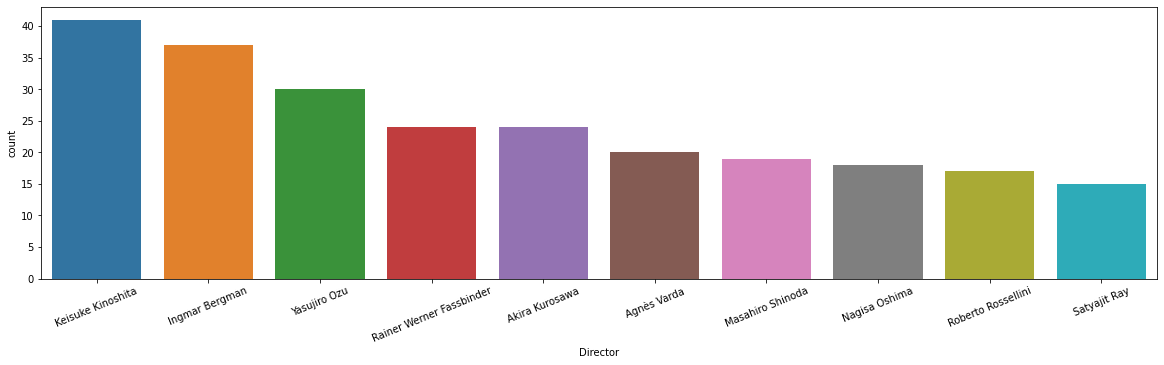

In [336]:
# Director figure
from matplotlib import pyplot
import seaborn
dim = (20, 5)
fig, ax = pyplot.subplots(figsize = dim)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 22.5)
ax = seaborn.countplot(x = data.Director, order = data.Director.value_counts().iloc[:10].index) # Sort by value_count

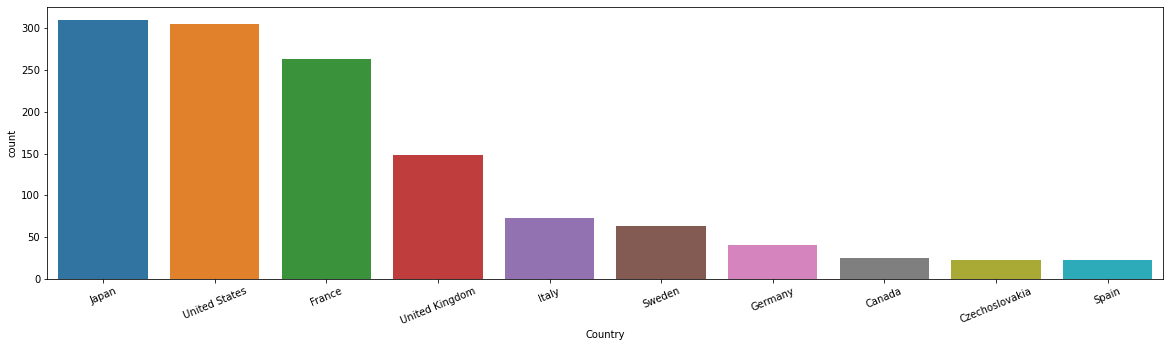

In [338]:
# Country figure
dim = (20, 5)
fig, ax = pyplot.subplots(figsize = dim)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 22.5)
ax = seaborn.countplot(x = data.Country, order = data.Country.value_counts().iloc[:10].index) # Sort by value_count

In [351]:
# Create decade column
data.insert(4, 'Decade', (data['Year'].astype(int)/10).apply(np.floor))

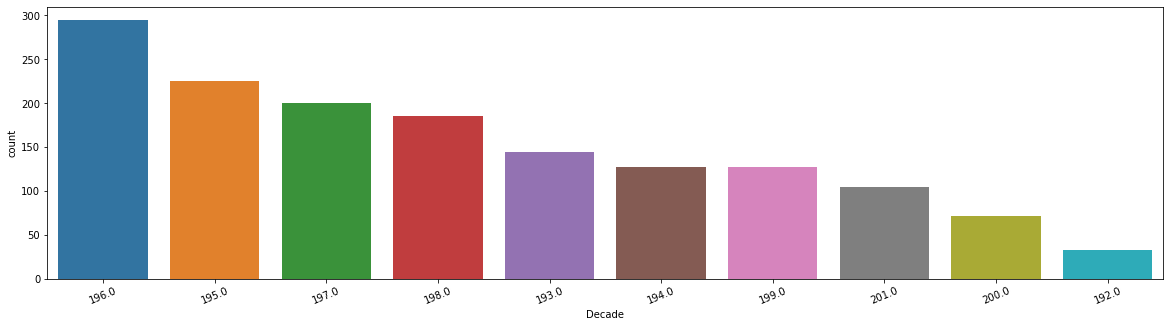

In [353]:
# Decade figure
dim = (20, 5)
fig, ax = pyplot.subplots(figsize = dim)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 22.5)
ax = seaborn.countplot(x = data.Decade, order = data.Decade.value_counts().iloc[:10].index) # Sort by value_count